<ul>
<li>Name : <b>Muhammad Ayaz</b></li>
<li>C/No : <b>221331</b></li>
<li>Subject : <b>Artificial Intelligence</b></li>
<li>Submitted to : <b>Dr. Muhammad Sajjad</b></li>
</ul>

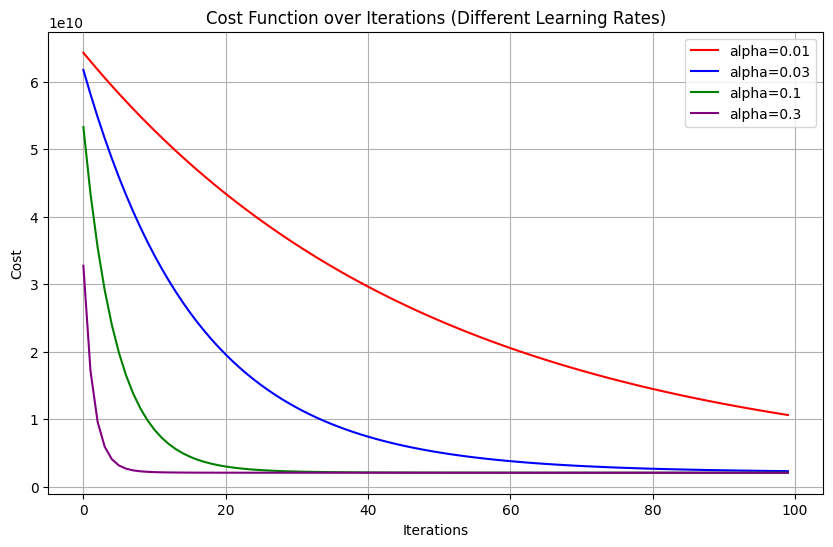

In [9]:
# 📌 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 📌 Step 2: Load Data
data = pd.read_csv("data.csv")
data
X = data[['Size (sqft)', 'Bedrooms']].values
y = data['Price'].values.reshape(-1, 1)

# 📌 Step 3: Feature Scaling
# Helps gradient descent converge faster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias unit (intercept) as the first column
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# 📌 Step 4: Cost Function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# 📌 Step 5: Gradient Descent Function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# 📌 Step 6: Try Multiple Learning Rates
learning_rates = [0.01, 0.03, 0.1, 0.3]
num_iters = 100
colors = ['red', 'blue', 'green', 'purple']

plt.figure(figsize=(10, 6))
for alpha, color in zip(learning_rates, colors):
    theta = np.zeros((X_scaled.shape[1], 1))
    _, cost_history = gradient_descent(X_scaled, y, theta, alpha, num_iters)
    plt.plot(range(num_iters), cost_history, label=f'alpha={alpha}', color=color)

plt.title('Cost Function over Iterations (Different Learning Rates)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()
